In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#使用numpy生成100个随机点
x_data = np.random.rand(100)
y_data = x_data*0.1 + 0.2
# 构造一个线性模型
# k,b初始为0 ，待训练
# y为预测值
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k*x_data + b
# 二次代价函数
loss = tf.reduce_mean(tf.square(y_data - y))
# 定义一个梯度下降法来进行训练的优化器,训练k和b的值
optimizer = tf.train.GradientDescentOptimizer(0.2)
# 最小化代价函数
train = optimizer.minimize(loss)
# 初始化变量
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if step%20 == 0:
            print(step,sess.run([k,b]))

0 [0.052179288, 0.09961346]
20 [0.10224261, 0.19882217]
40 [0.101310045, 0.19931202]
60 [0.100765266, 0.19959812]
80 [0.10044704, 0.19976524]
100 [0.10026114, 0.19986287]
120 [0.10015253, 0.1999199]
140 [0.100089096, 0.19995321]
160 [0.10005204, 0.19997267]
180 [0.1000304, 0.19998404]
200 [0.10001775, 0.19999067]


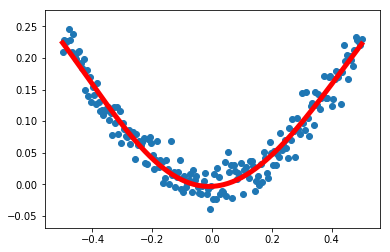

In [22]:
# 非线性回归
# 输入层: 1 , 中间层：10  输出层：1

# 使用numpy生成200个随机点
# linspace：从-0.5到0.5均匀生成200个点，包含-0.5--0.5
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
# 干扰项，噪音
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

# 定义两个占位符，待输入的数据
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# 神经网络输入层与中间层的参数：权重，偏置值，激活函数tanh
# 初始时随机生成值，待训练
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 神经网络中间层与输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
# 预测的输出值
prediction = tf.nn.tanh(Wx_plus_b_L2)
# 二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction))
# 使用梯度下降法训练，最小化loss
train_step = tf.train.GradientDescentOptimizer(0.3).minimize(loss)

with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        # 开始训练，传入输入值x，与真实值y
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    # 训练结束，开始预测
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    # 画图
    plt.figure()
    # 散点图打印样本点
    plt.scatter(x_data,y_data)
    # 预测结果，'r-': r表示红色，-表示实线，lw：线宽
    plt.plot(x_data,prediction_value,'r-',lw = 5)
    plt.show()
